In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from imports import *
from datetime import datetime, timedelta
import staircase as sc
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


In [9]:
df = pd.read_csv(r"..//data/vessel_queue.csv", parse_dates=['enter', 'leave'], dayfirst=True)
df.sort_values(by=['leave'],inplace=True)

vsteps = Steps.read_dataframe(df.head(150),'enter','leave')
#queue = sc.Stairs(use_dates=True).layer(df.enter, df.leave)


In [10]:
step_dict = vsteps.to_dict()

In [11]:
asteps = Steps.read_array(df.head(150).enter, df.head(150).leave,use_datetime=True)
dsteps = Steps.read_dict(step_dict)
step_dict.keys()[0]

Timestamp('2020-01-01 04:40:00')

In [12]:
df_vsteps = vsteps.to_dataframe() #
df_vsteps.head()

,start,end,value
0,NaT,2020-01-01 04:40:00,1
1,2020-01-01 09:35:00,2020-01-03 12:07:00,1
2,NaT,2020-01-01 11:47:00,1
3,2020-01-01 17:29:00,2020-01-04 04:43:00,1
4,2020-01-01 20:47:00,2020-01-04 08:58:00,1


In [13]:
vsteps_df = Steps.read_dataframe(df_vsteps,'start','end')

<AxesSubplot:>

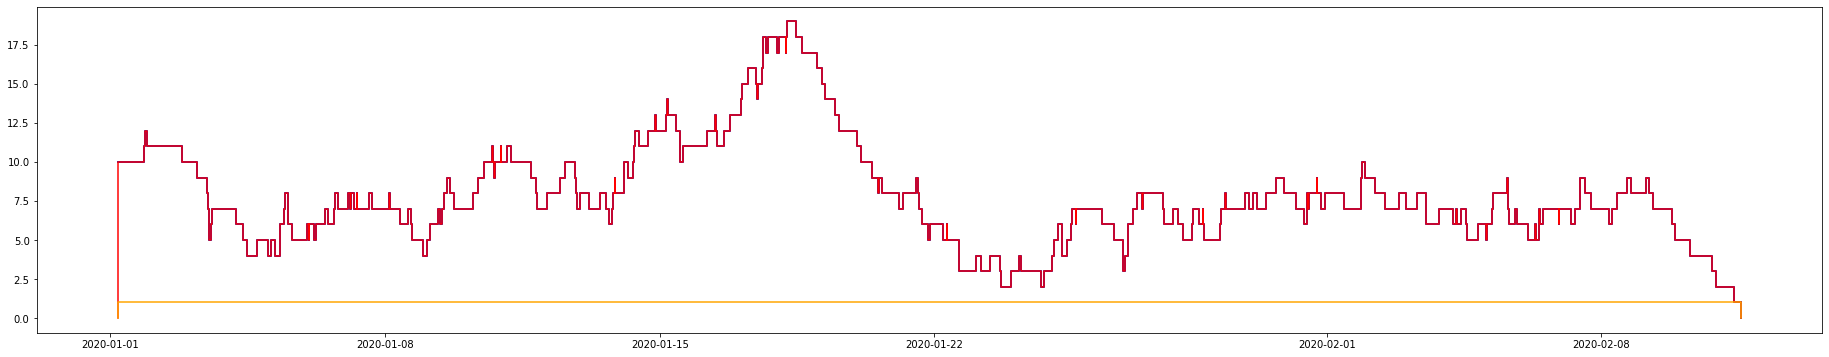

In [14]:
ax = vsteps_df.plot(size=(32,6))
vsteps.plot(ax=ax,color='g')
asteps.plot(ax=ax,color='blue')
dsteps.plot(ax=ax,color='r')
dsteps.normalise().plot(ax=ax,color='orange')

<AxesSubplot:>

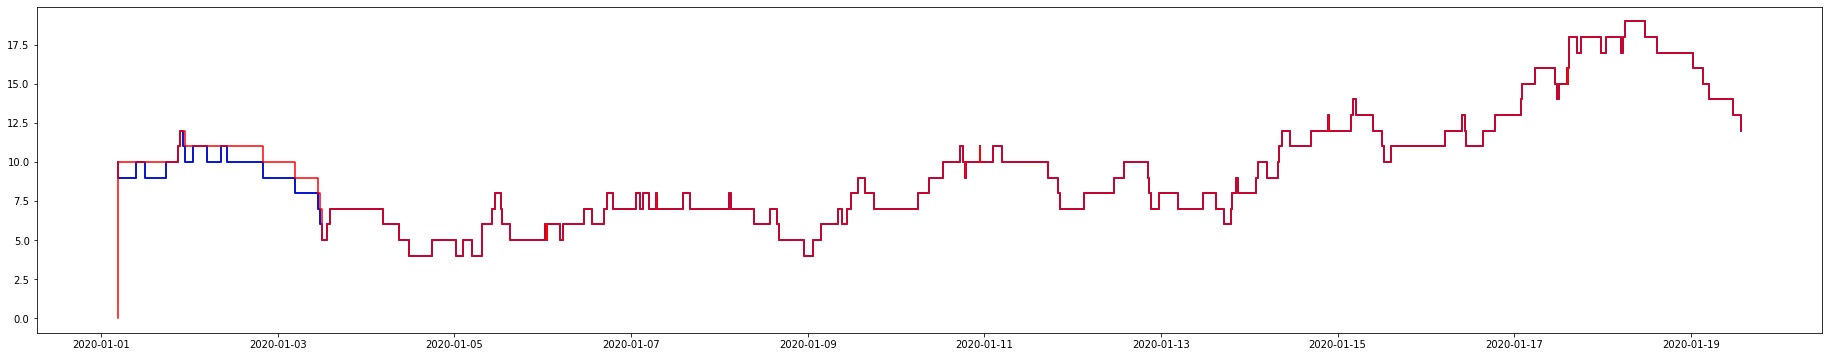

In [15]:
ax = vsteps_df.clip(ubound=pd.Timestamp(2020,1,20)).plot(size=(32,6))
vsteps.clip(ubound=pd.Timestamp(2020,1,20)).plot(ax=ax,color='g')
asteps.clip(ubound=pd.Timestamp(2020,1,20)).plot(ax=ax,color='blue')
dsteps.clip(ubound=pd.Timestamp(2020,1,20)).plot(ax=ax,color='red')


In [9]:
dfdf = vsteps_df.clip(lbound=pd.Timestamp(2020,1,10),ubound=pd.Timestamp(2020,1,20)) #.to_dataframe(mode='aggregate')
vstep_clipped = vsteps.clip(lbound=pd.Timestamp(2020,1,10),ubound=pd.Timestamp(2020,1,20))
vstep_clipped.steps()

array([2020-01-10 00:00:00:7, 2020-01-10 08:59:00:1,
       2020-01-10 12:41:00:1, 2020-01-10 17:29:00:1,
       2020-01-10 18:16:00:-1, 2020-01-10 18:49:00:-1,
       2020-01-10 19:05:00:1, 2020-01-10 22:41:00:1,
       2020-01-10 22:50:00:-1, 2020-01-11 02:17:00:1,
       2020-01-11 04:49:00:-1, 2020-01-11 17:21:00:-1,
       2020-01-11 20:08:00:-1, 2020-01-11 20:41:00:-1,
       2020-01-12 03:05:00:1, 2020-01-12 11:11:00:1,
       2020-01-12 20:20:00:-1, 2020-01-12 20:41:00:-1,
       2020-01-12 21:14:00:-1, 2020-01-13 04:40:00:-1,
       2020-01-13 14:59:00:-1, 2020-01-13 17:09:00:-1,
       2020-01-13 20:49:00:-1, 2020-01-14 04:52:00:-1], dtype=object)

In [12]:
#tbase = Basis(Basis.tanh,52416)

p = np.arange(pd.Timestamp(2020,1,31), pd.Timestamp(2020,2,4), pd.Timedelta(minutes=1)).astype(pd.Timestamp)
#px = [x.timestamp() for x in p]
fig,ax = plt.subplots(nrows=4,figsize=(20,12))

#vsteps.clip(lbound=pd.Timestamp(2020,2,1),ubound=pd.Timestamp(2020,2,3)).plot(ax=ax[0])
v_ul_clip = vsteps.clip(lbound=pd.Timestamp(2020,2,1),ubound=pd.Timestamp(2020,2,10))
v_ul_clip.plot(ax=ax[0])
#(v_ul_clip>=10).plot(ax=ax[0],color='blue')
# v_ul_clip.smooth_plot(ax=ax[0],color='g')
#v_ul_clip.smooth_plot(ax=ax[0],color='g')
#(v_ul_clip).smooth_plot(ax=ax[0],color='r')

#first_step_full = (vsteps.steps())[0]
#(v_ul_clip.steps())[0].plot(ax=ax[0],color='blue')
#ax[0].step(p,first_step(p),color='blue')
#ax[0].step(p,(v_ul_clip<<timedelta(minutes=660))(p),color='g')

#queue.clip(lower=pd.Timestamp(2020,2,1),upper=pd.Timestamp(2020,3,1)).plot(ax[0])

queue.clip(upper=pd.Timestamp(2020,1,12)).plot(ax[1])
vsteps.clip(ubound=pd.Timestamp(2020,1,12)).plot(ax=ax[1])


vsteps.clip(lbound=pd.Timestamp(2020,2,1)).plot(ax=ax[2])
queue.clip(lower=pd.Timestamp(2020,2,1)).plot(ax[2])

vsteps.plot(ax=ax[3])
#(vsteps).smooth_plot(ax=ax[3],color='r')
#(vsteps>>pd.Timedelta(hours=11)).plot(method='function',ax=ax[3],color='g')
((vsteps>10)).plot(ax=ax[3],color='g')
#+Step(weight=10,use_datetime=True)
#print((v_ul_clip<<timedelta(minutes=660))(datetime(2020,2,1,6,0)))
#ax[2].step(np.arange(len(vsteps[pd.Timestamp(2020,1,1):pd.Timestamp(2020,1,2):pd.Timedelta(minutes=10)])),vsteps[pd.Timestamp(2020,1,1):pd.Timestamp(2020,1,2):pd.Timedelta(minutes=10)])

# print(queue.clip(lower=pd.Timestamp(2020,2,1),upper=pd.Timestamp(2020,3,1)).mean())
# print((vsteps.clip(lbound=pd.Timestamp(2020,2,1),ubound=pd.Timestamp(2020,3,1))).mean())

# print(queue.clip(upper=pd.Timestamp(2020,3,1)).mean())
# print((vsteps.clip(ubound=pd.Timestamp(2020,3,1))).mean())

# print(queue.clip(lower=pd.Timestamp(2020,2,1)).mean())
# print(vsteps.clip(lbound=pd.Timestamp(2020,2,1)).mean())


NameError: name 'queue' is not defined